# Exercise 1 - Data storytelling

## 3. Exploring and explaining happiness

### Column Name and Meaning 
- Ladder score = The average happiness score for people in that country, based on the Cantril Ladder (0–10 scale). Comes from survey data
- Upperwhisker = The upper bound of the confidence interval. Statistically calculated to show where the true average might be if the survey were repeated
- Lowerwhisker = The lower bound of the confidence interval. 
- Explained by: Log GDP per capita = The part of the happiness score explained by the country’s wealth, measured as the logarithm of GDP per person.
- Explained by: Social support = How much happiness is explained by having someone to rely on in times of trouble. Based on survey responses (e.g., “Do you have someone you can count on?”)
- Explained by: Healthy life expectancy =  The impact on happiness from living longer, healthier lives. 
- Explained by: Freedom to make life choices Comes from survey question like “Are you satisfied with your freedom to choose what you do with your life?”
- Explained by: Generosity = The impact of charitable behavior or kindness on happiness. Comes from survey: “Have you donated money to charity recently?” and other generosity metrics.
- Explained by: Perceptions of corruption. Based on surveys asking about perceptions of corruption + trust levels.
- Dystopia + residual. "Dystopia" is a hypothetical worst-case country — lowest scores for all factors. Residual is the part that can’t be explained by the known factors. They add a baseline happiness from a "Dystopia" (lowest scores), then any unexplained positive effects from culture, history, etc., are in the "residual."

In [14]:
import pandas as pd

df = pd.read_excel("data/happiness.xlsx")
df.head(3)

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233


## What is the contribution of each factor to happiness score in top 4 countries (Scandinavian)
- Ladder Score ≈ (Sum of all "Explained by" components) + (Dystopia + residual)

In [15]:
happy_top4 = df.iloc[:4].copy()

# Remove 'Explained by:' from each column name, if present
happy_top4.columns = happy_top4.columns.str.replace('Explained by: ', '', regex=False)

# Set 'Country name' as the index for happy_top4
happy_top4.set_index("Country name", inplace=True)
happy_top4

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,
Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707


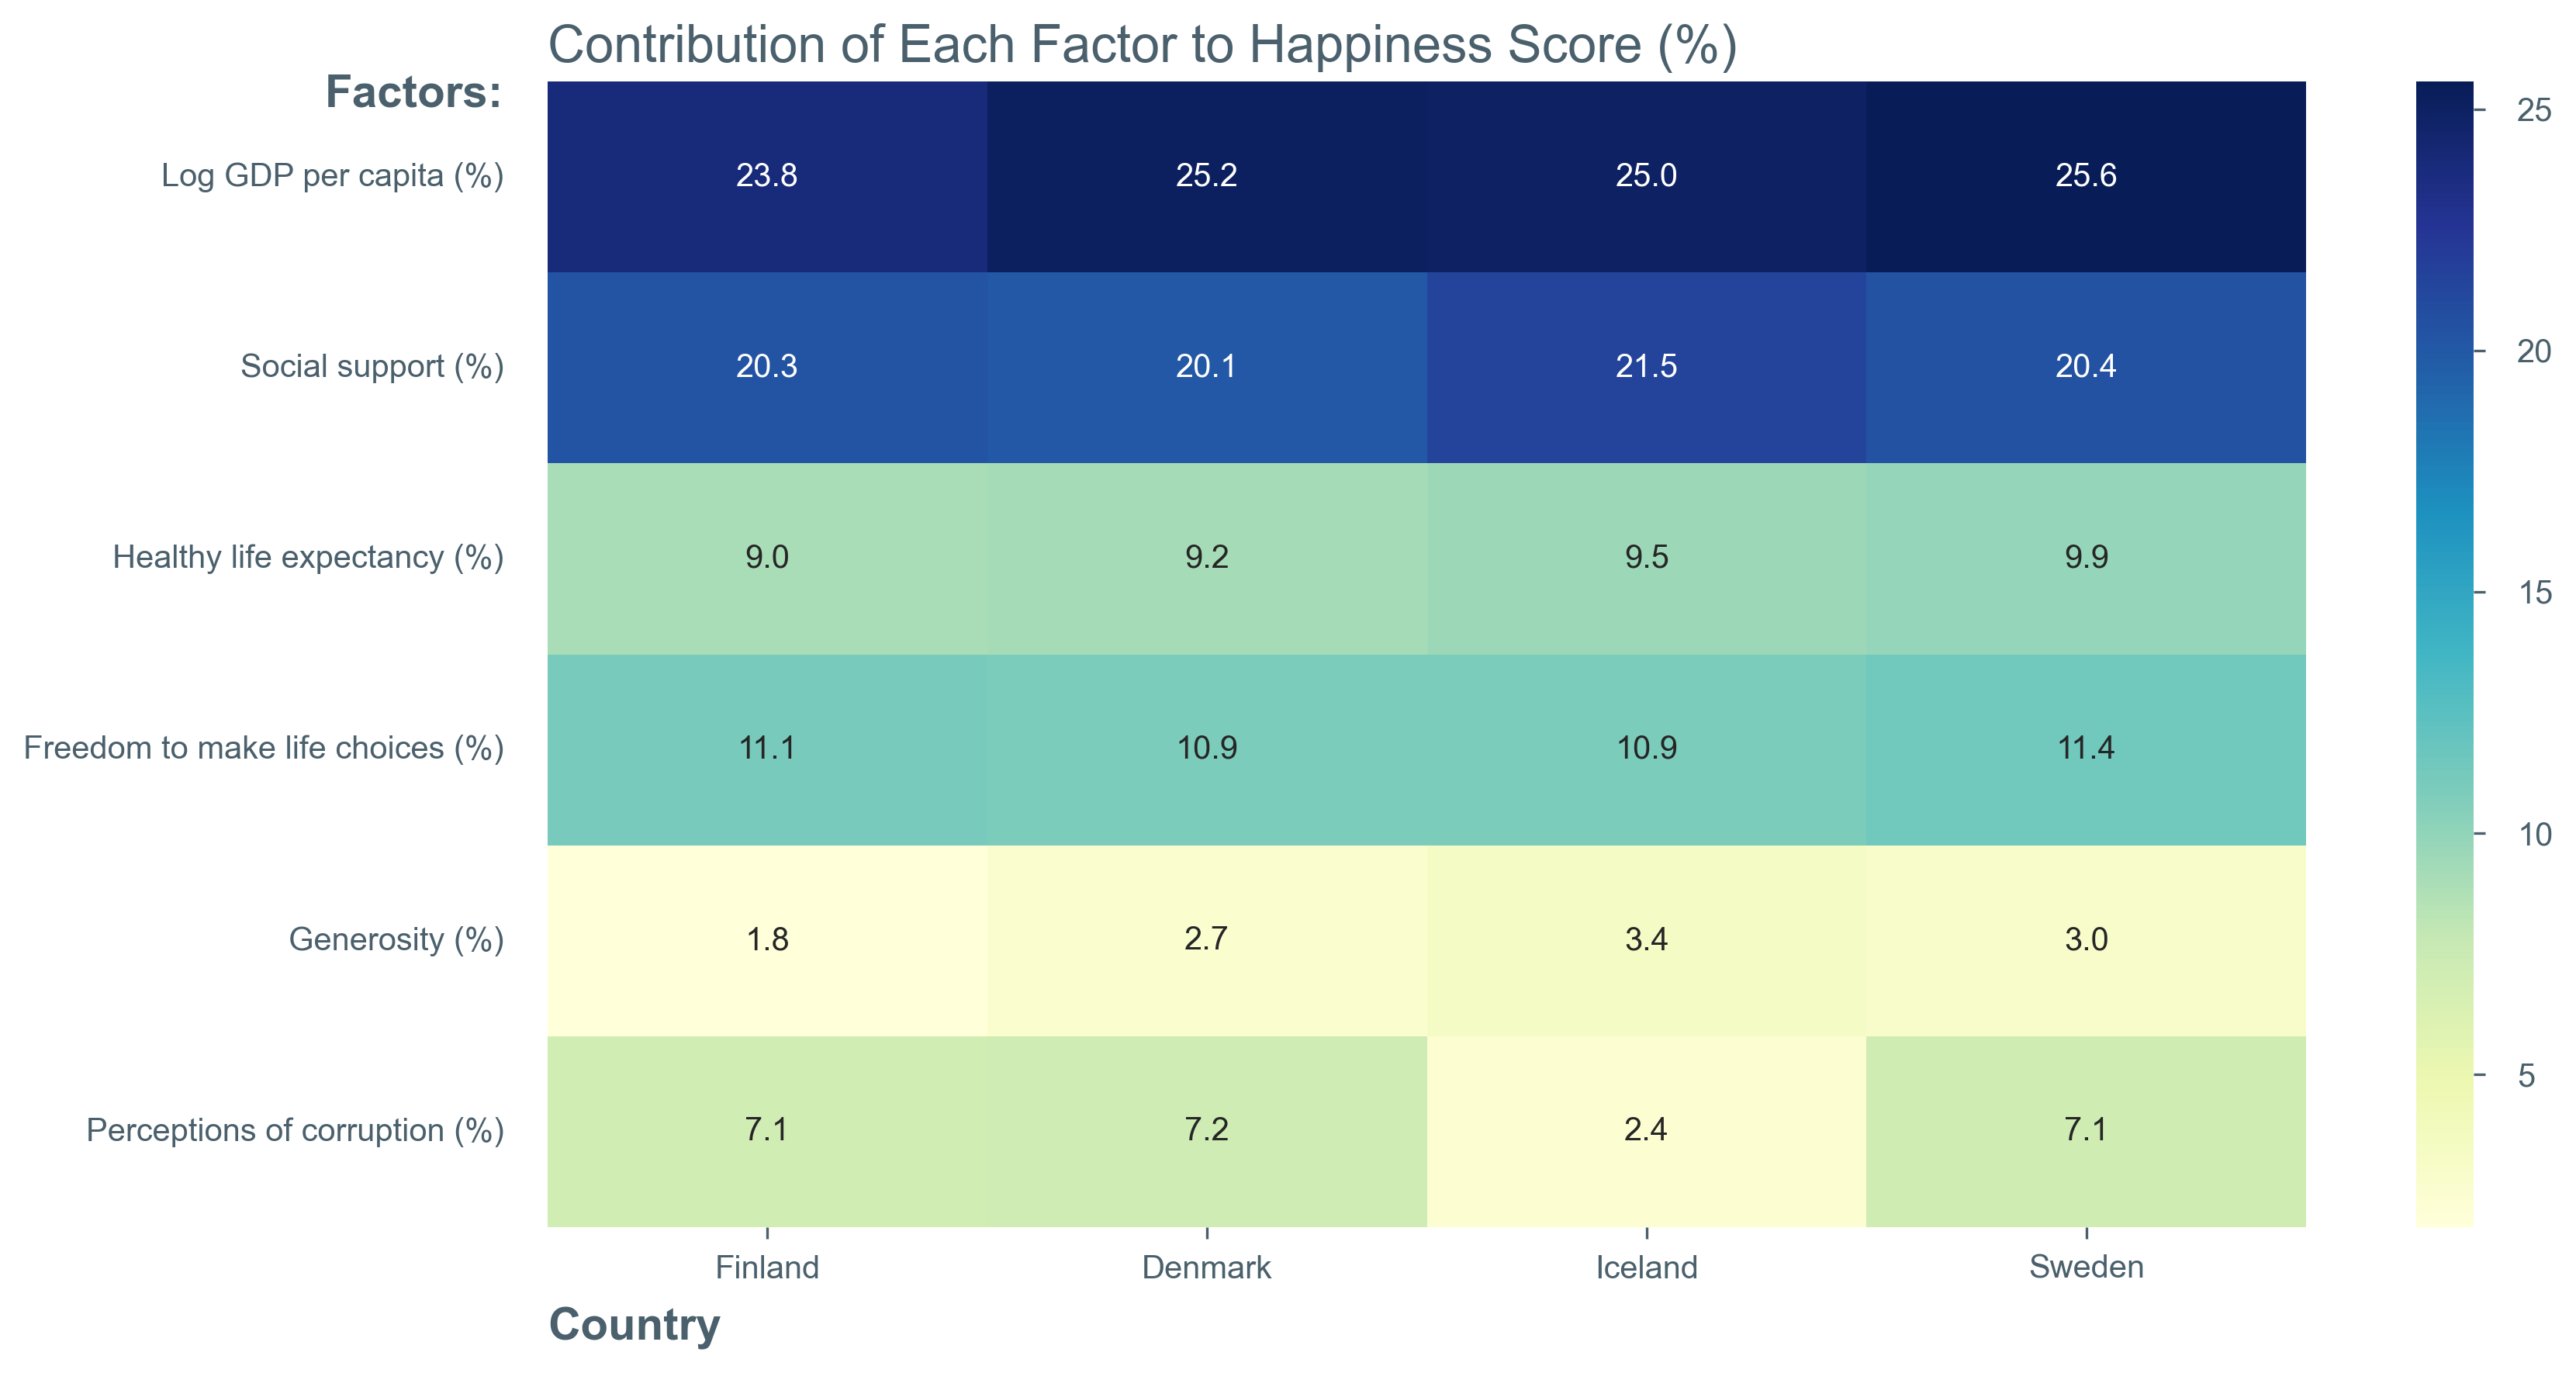

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("styles/base.mplstyle")

# Get list of original factor columns, excluding already calculated percentage columns
factor_columns = [col for col in happy_top4.columns 
                  if col not in ['Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'] 
                  and not col.endswith(' (%)')]

# Calculate or update percentage contribution columns
for col in factor_columns:
    pct_col = f'{col} (%)'
    # Always (re)calculate to ensure correct values
    happy_top4[pct_col] = (happy_top4[col] / happy_top4['Ladder score']) * 100

# Prepare heatmap data
percentage_columns = [f'{col} (%)' for col in factor_columns]
heatmap_data = happy_top4[percentage_columns]

# Transpose the heatmap data
heatmap_data_pivot_top = heatmap_data.T

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data_pivot_top, annot=True, cmap="YlGnBu", fmt=".1f")
ax.set_title('Contribution of Each Factor to Happiness Score (%)', fontsize=16, loc = 'left')
ax.set_ylabel('Factors:', fontsize=14, rotation=0)
ax.yaxis.set_label_coords(-0.076, 0.97)
plt.xlabel('Country', fontsize=14, loc = 'left')
plt.tight_layout()
plt.show()


## ## What is the contribution of each factor to happiness score in bottom 4 countries

In [41]:
# Identify the last 4 countries (assuming they are the least happy due to pre-sorting)
least_happy_4 = df.tail(4).copy()

# Remove 'Explained by:' from each column name, if present
least_happy_4.columns = least_happy_4.columns.str.replace('Explained by: ', '', regex=False)

# Set 'Country name' as the index for happy_top4
least_happy_4.set_index("Country name", inplace=True)
least_happy_4

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,
Sierra Leone,3.2452,3.366252,3.124148,0.654278,0.565977,0.253321,0.469035,0.181365,0.053299,1.067906
Lesotho,3.1862,3.468785,2.903615,0.770807,0.850587,0.000000,0.523188,0.082087,0.084969,0.874525
Lebanon,2.7065,2.796744,2.616256,1.376726,0.576713,0.556247,0.173223,0.067641,0.028772,-0.072831
Afghanistan,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903


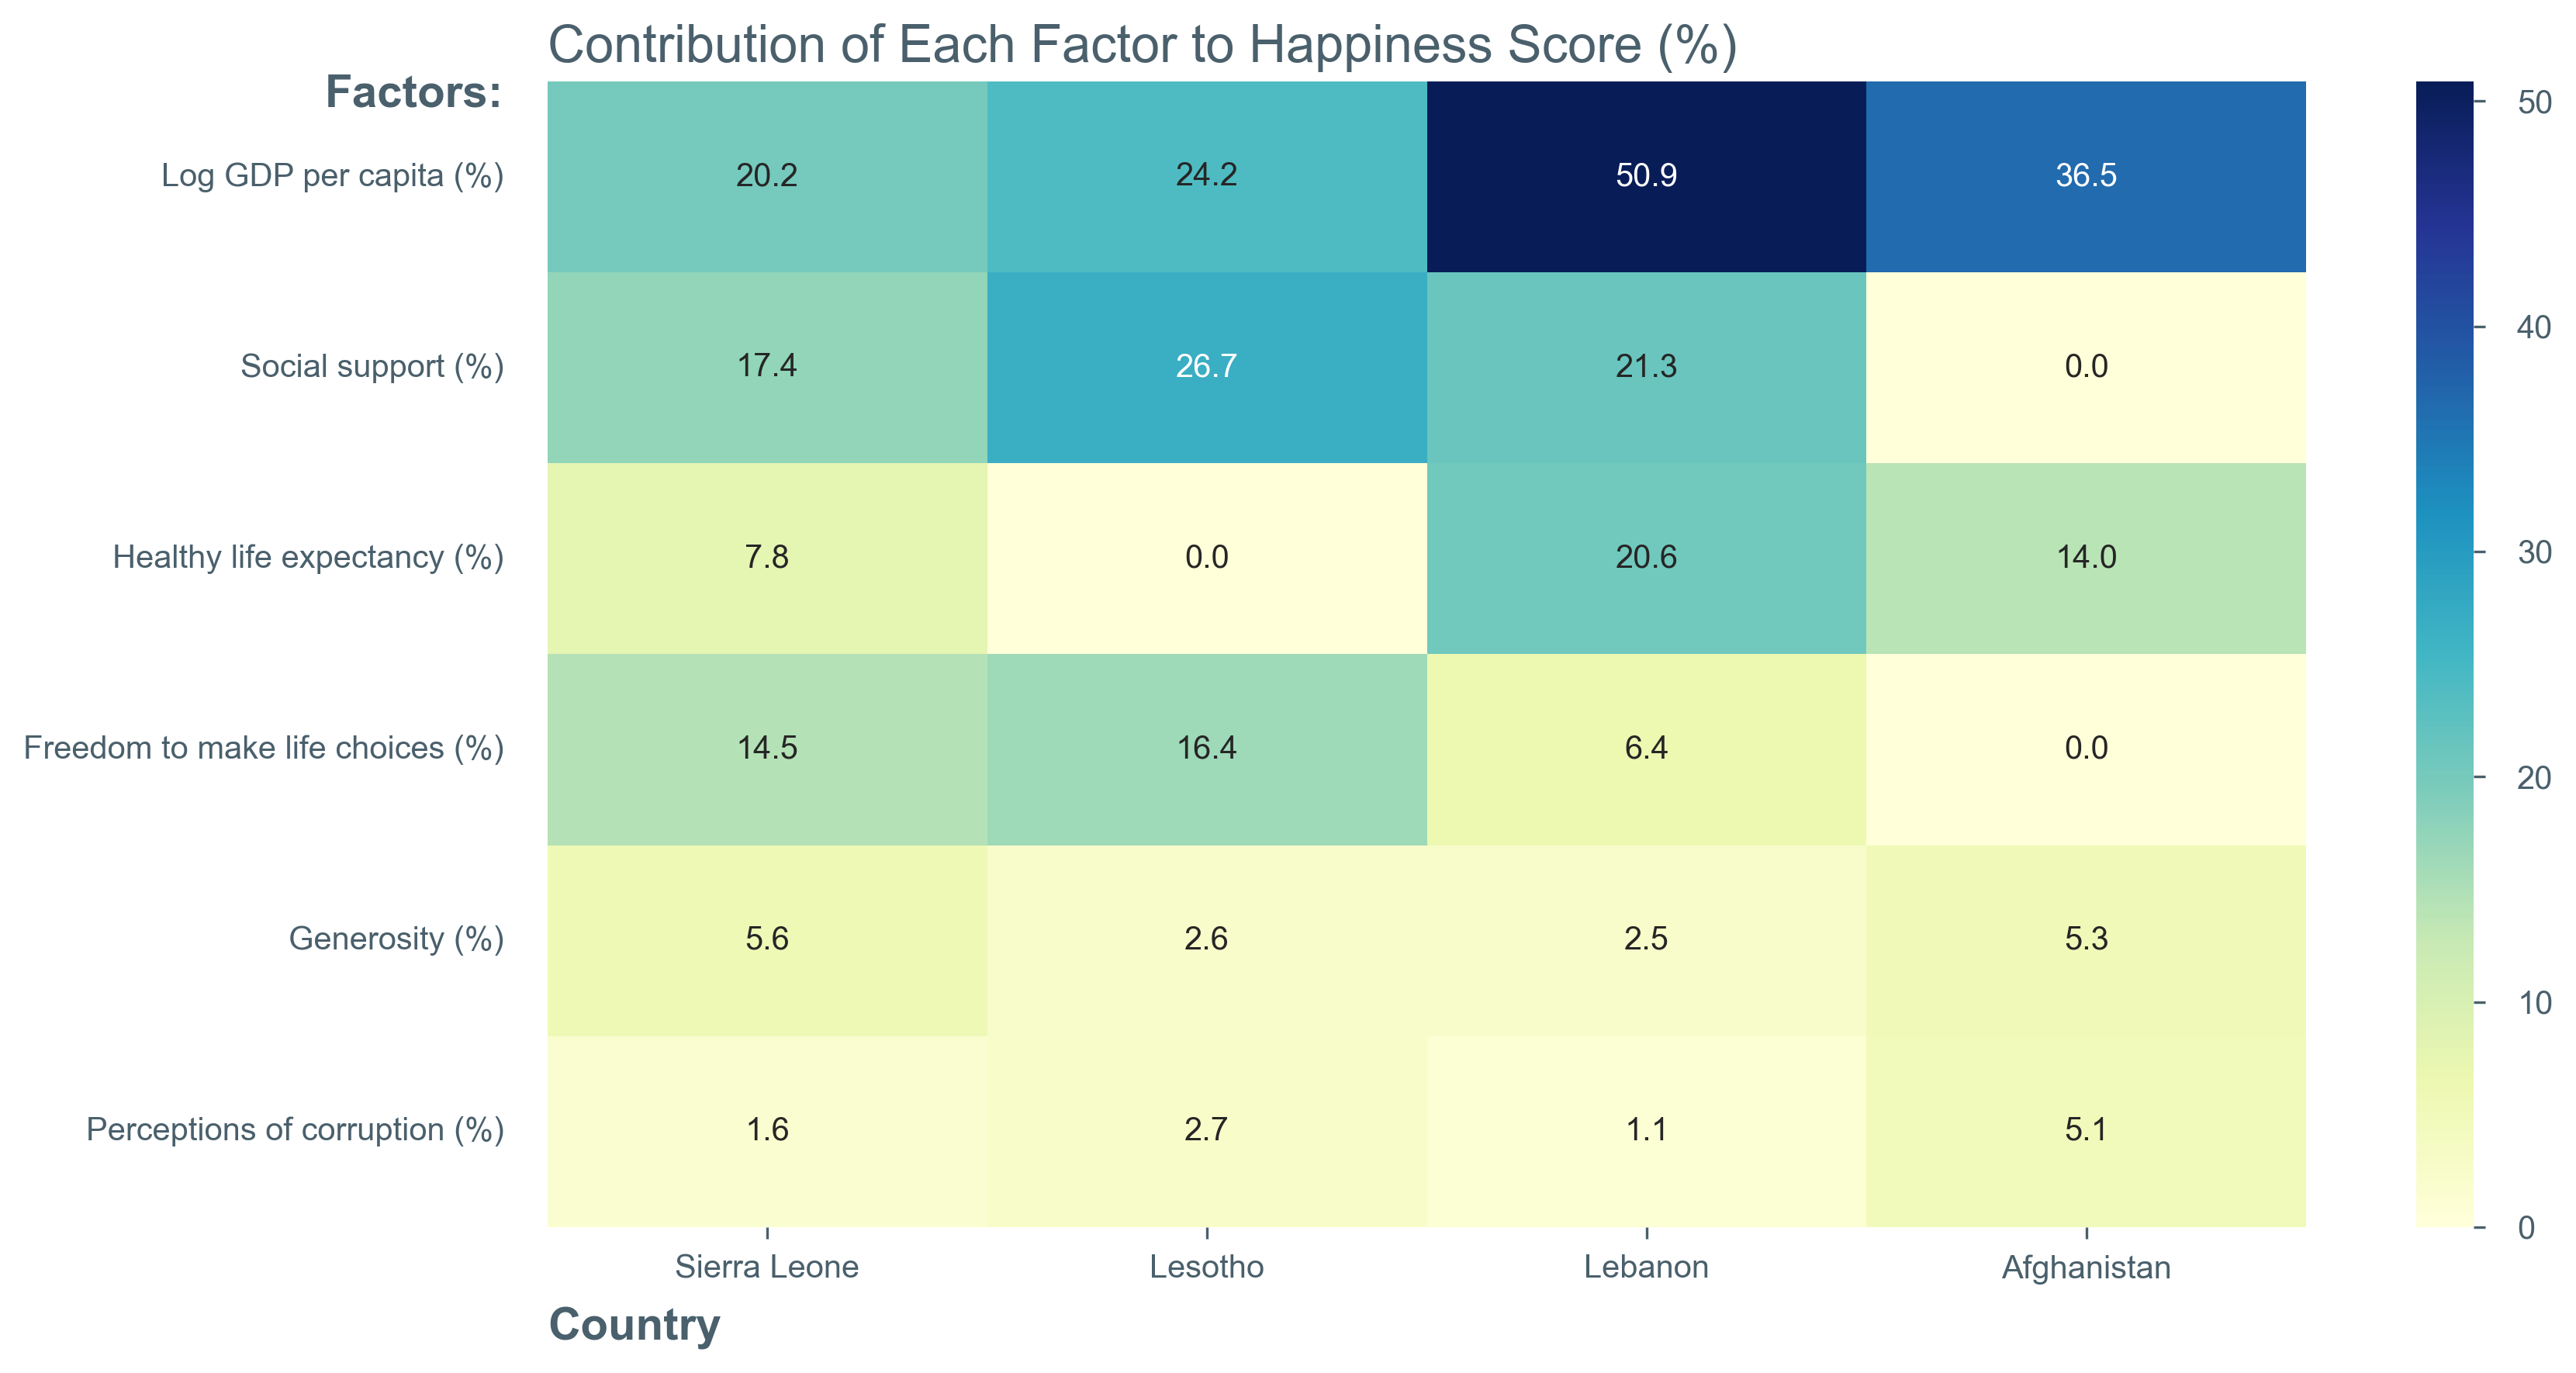

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("styles/base.mplstyle")

# Get list of original factor columns, excluding already calculated percentage columns
factor_columns_least = [col for col in happy_top4.columns 
                  if col not in ['Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'] 
                  and not col.endswith(' (%)')]

# Calculate or update percentage contribution columns
for col in factor_columns_least:
    pct_col = f'{col} (%)'
    # Always (re)calculate to ensure correct values
    least_happy_4[pct_col] = (least_happy_4[col] / least_happy_4['Ladder score']) * 100

# Prepare heatmap data
percentage_columns_least = [f'{col} (%)' for col in factor_columns_least]
heatmap_data_least = least_happy_4[percentage_columns]

# Transpose the heatmap data
heatmap_data_pivot_least = heatmap_data_least.T

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data_pivot_least, annot=True, cmap="YlGnBu", fmt=".1f")
ax.set_title('Contribution of Each Factor to Happiness Score (%)', fontsize=16, loc = 'left')
ax.set_ylabel('Factors:', fontsize=14, rotation=0)
ax.yaxis.set_label_coords(-0.076, 0.97)
plt.xlabel('Country', fontsize=14, loc = 'left')
plt.tight_layout()
plt.show()


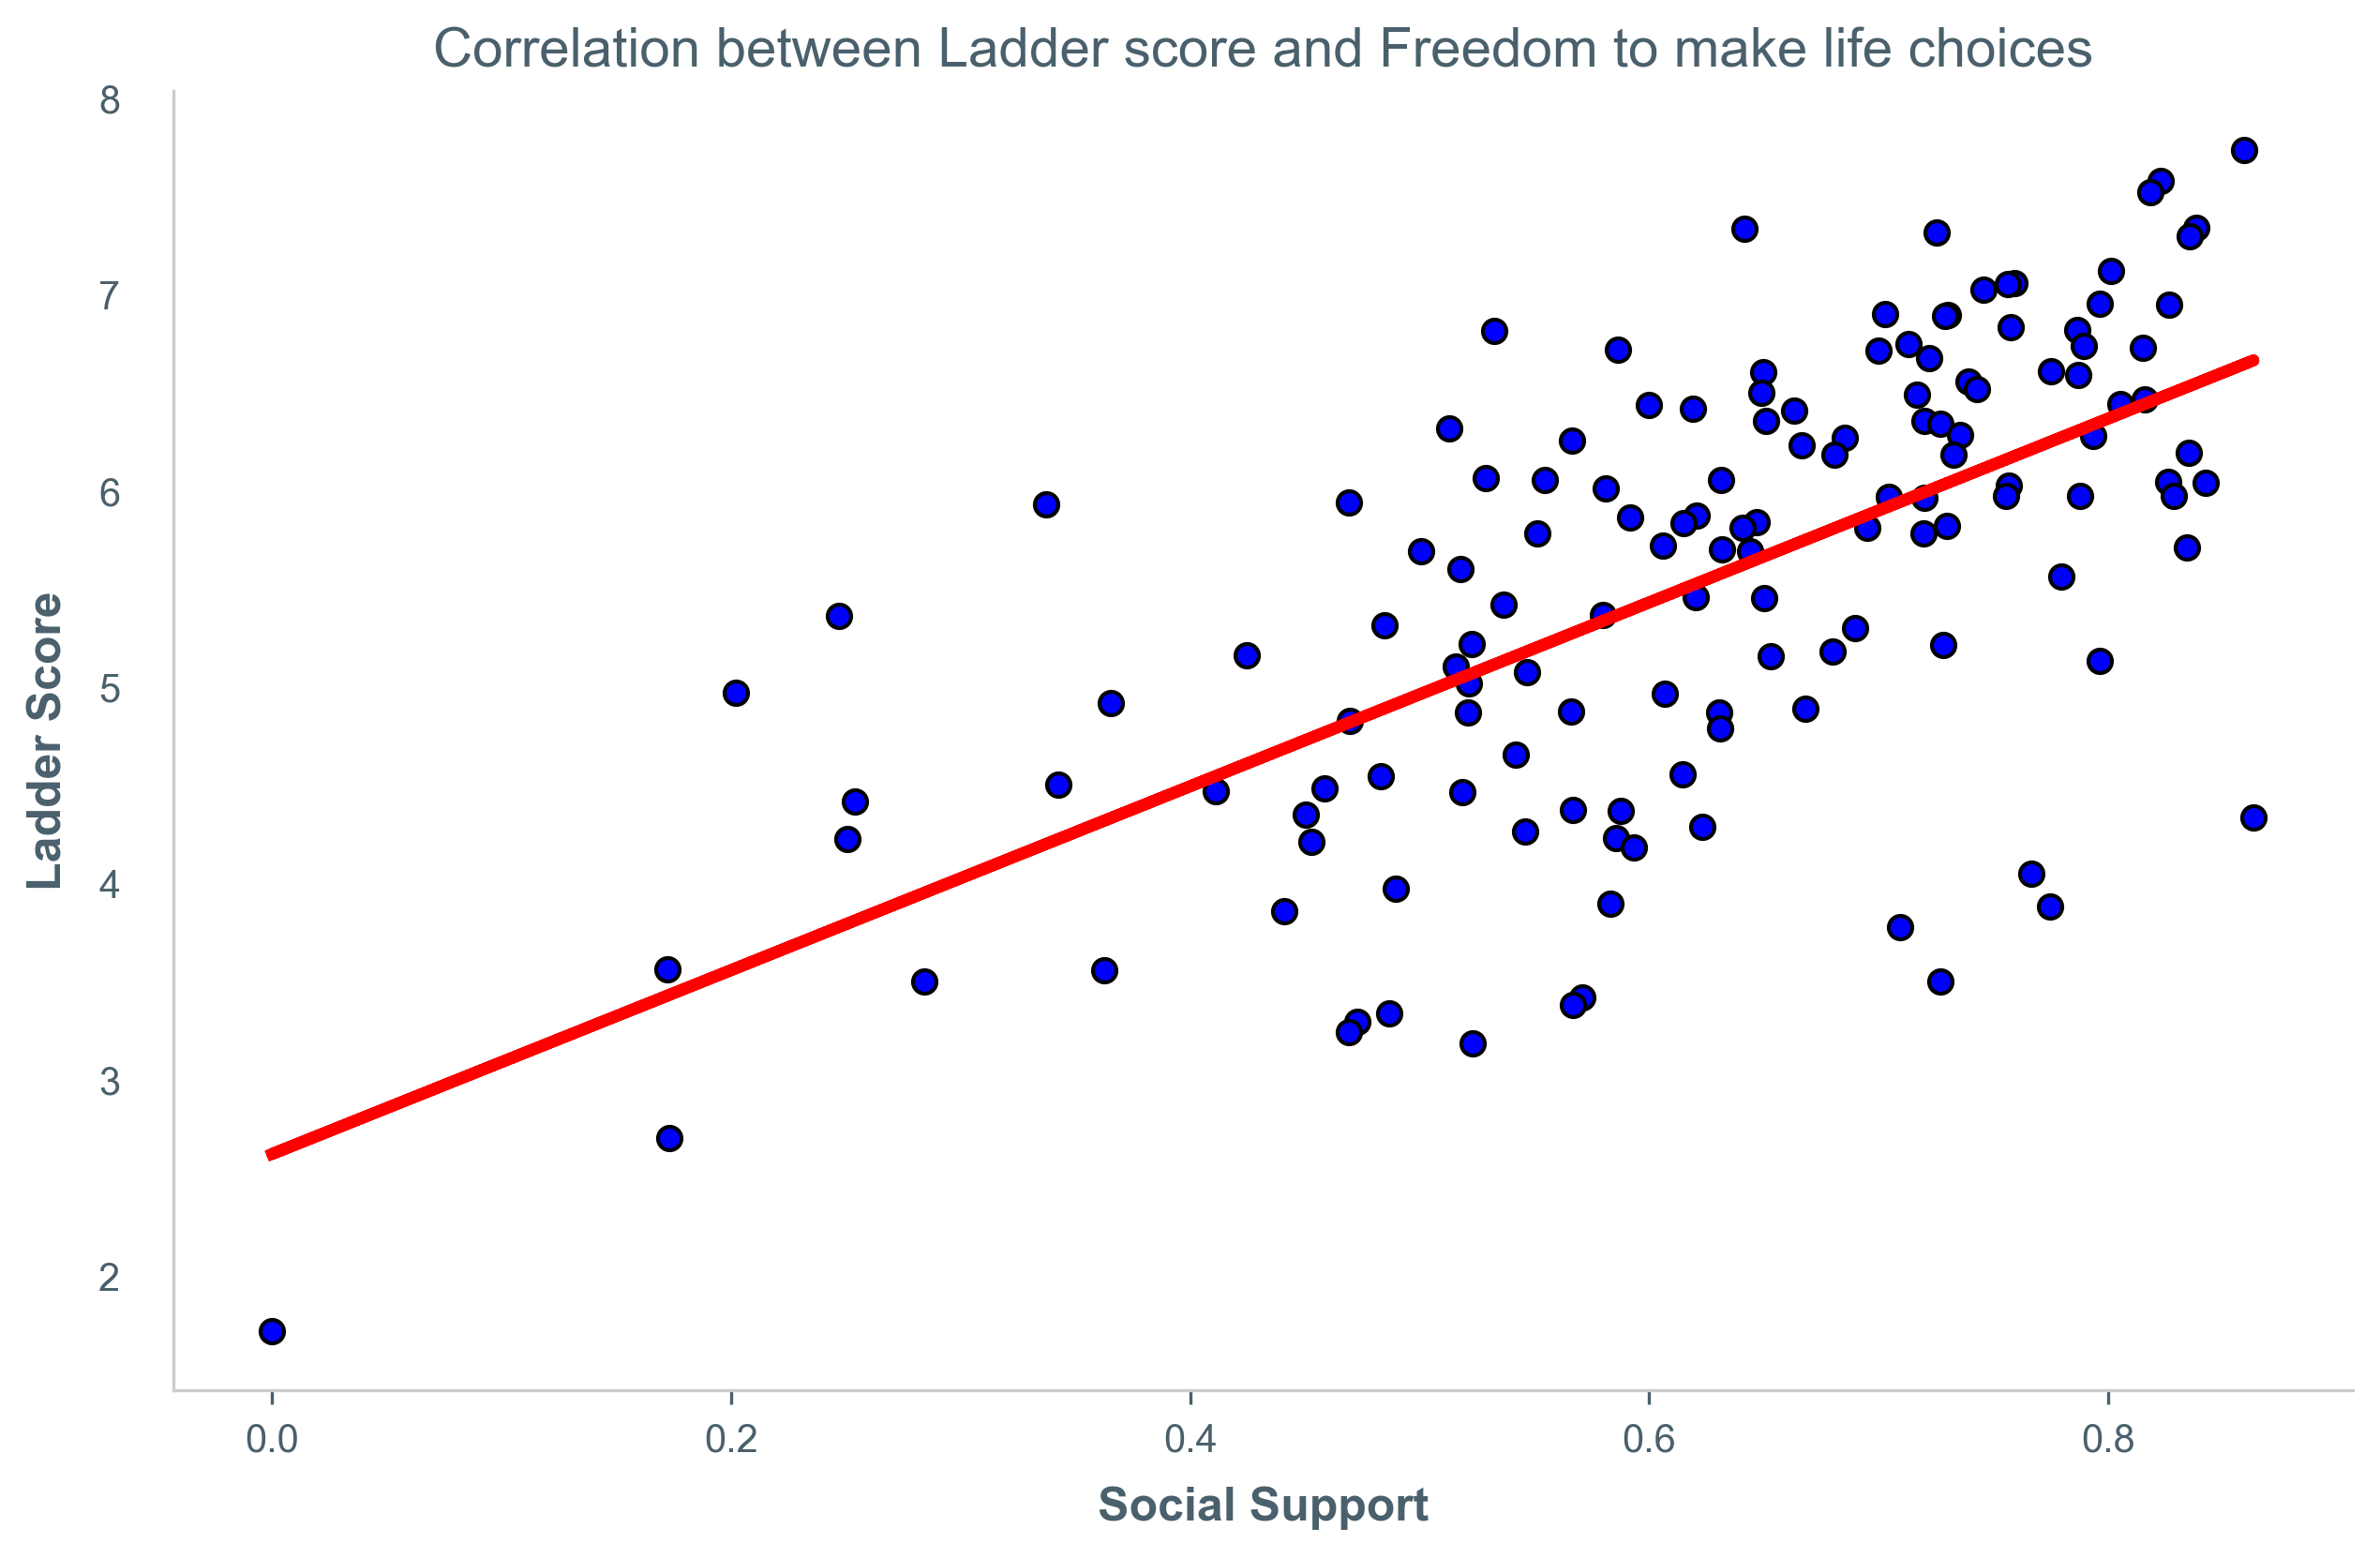

In [45]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting the correlation between Ladder score and Social support
plt.scatter(df['Explained by: Freedom to make life choices'], df['Ladder score'], color='blue', edgecolors='black')

# Select only the needed columns and drop any rows with missing data
x = df['Explained by: Freedom to make life choices']
y = df['Ladder score']

# Drop NaNs
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Add trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Fit: y = {m:.2f}x + {b:.2f}')

# Adding labels and title
plt.title('Correlation between Ladder score and Freedom to make life choices', fontsize=14)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)

# Show plot
plt.show()

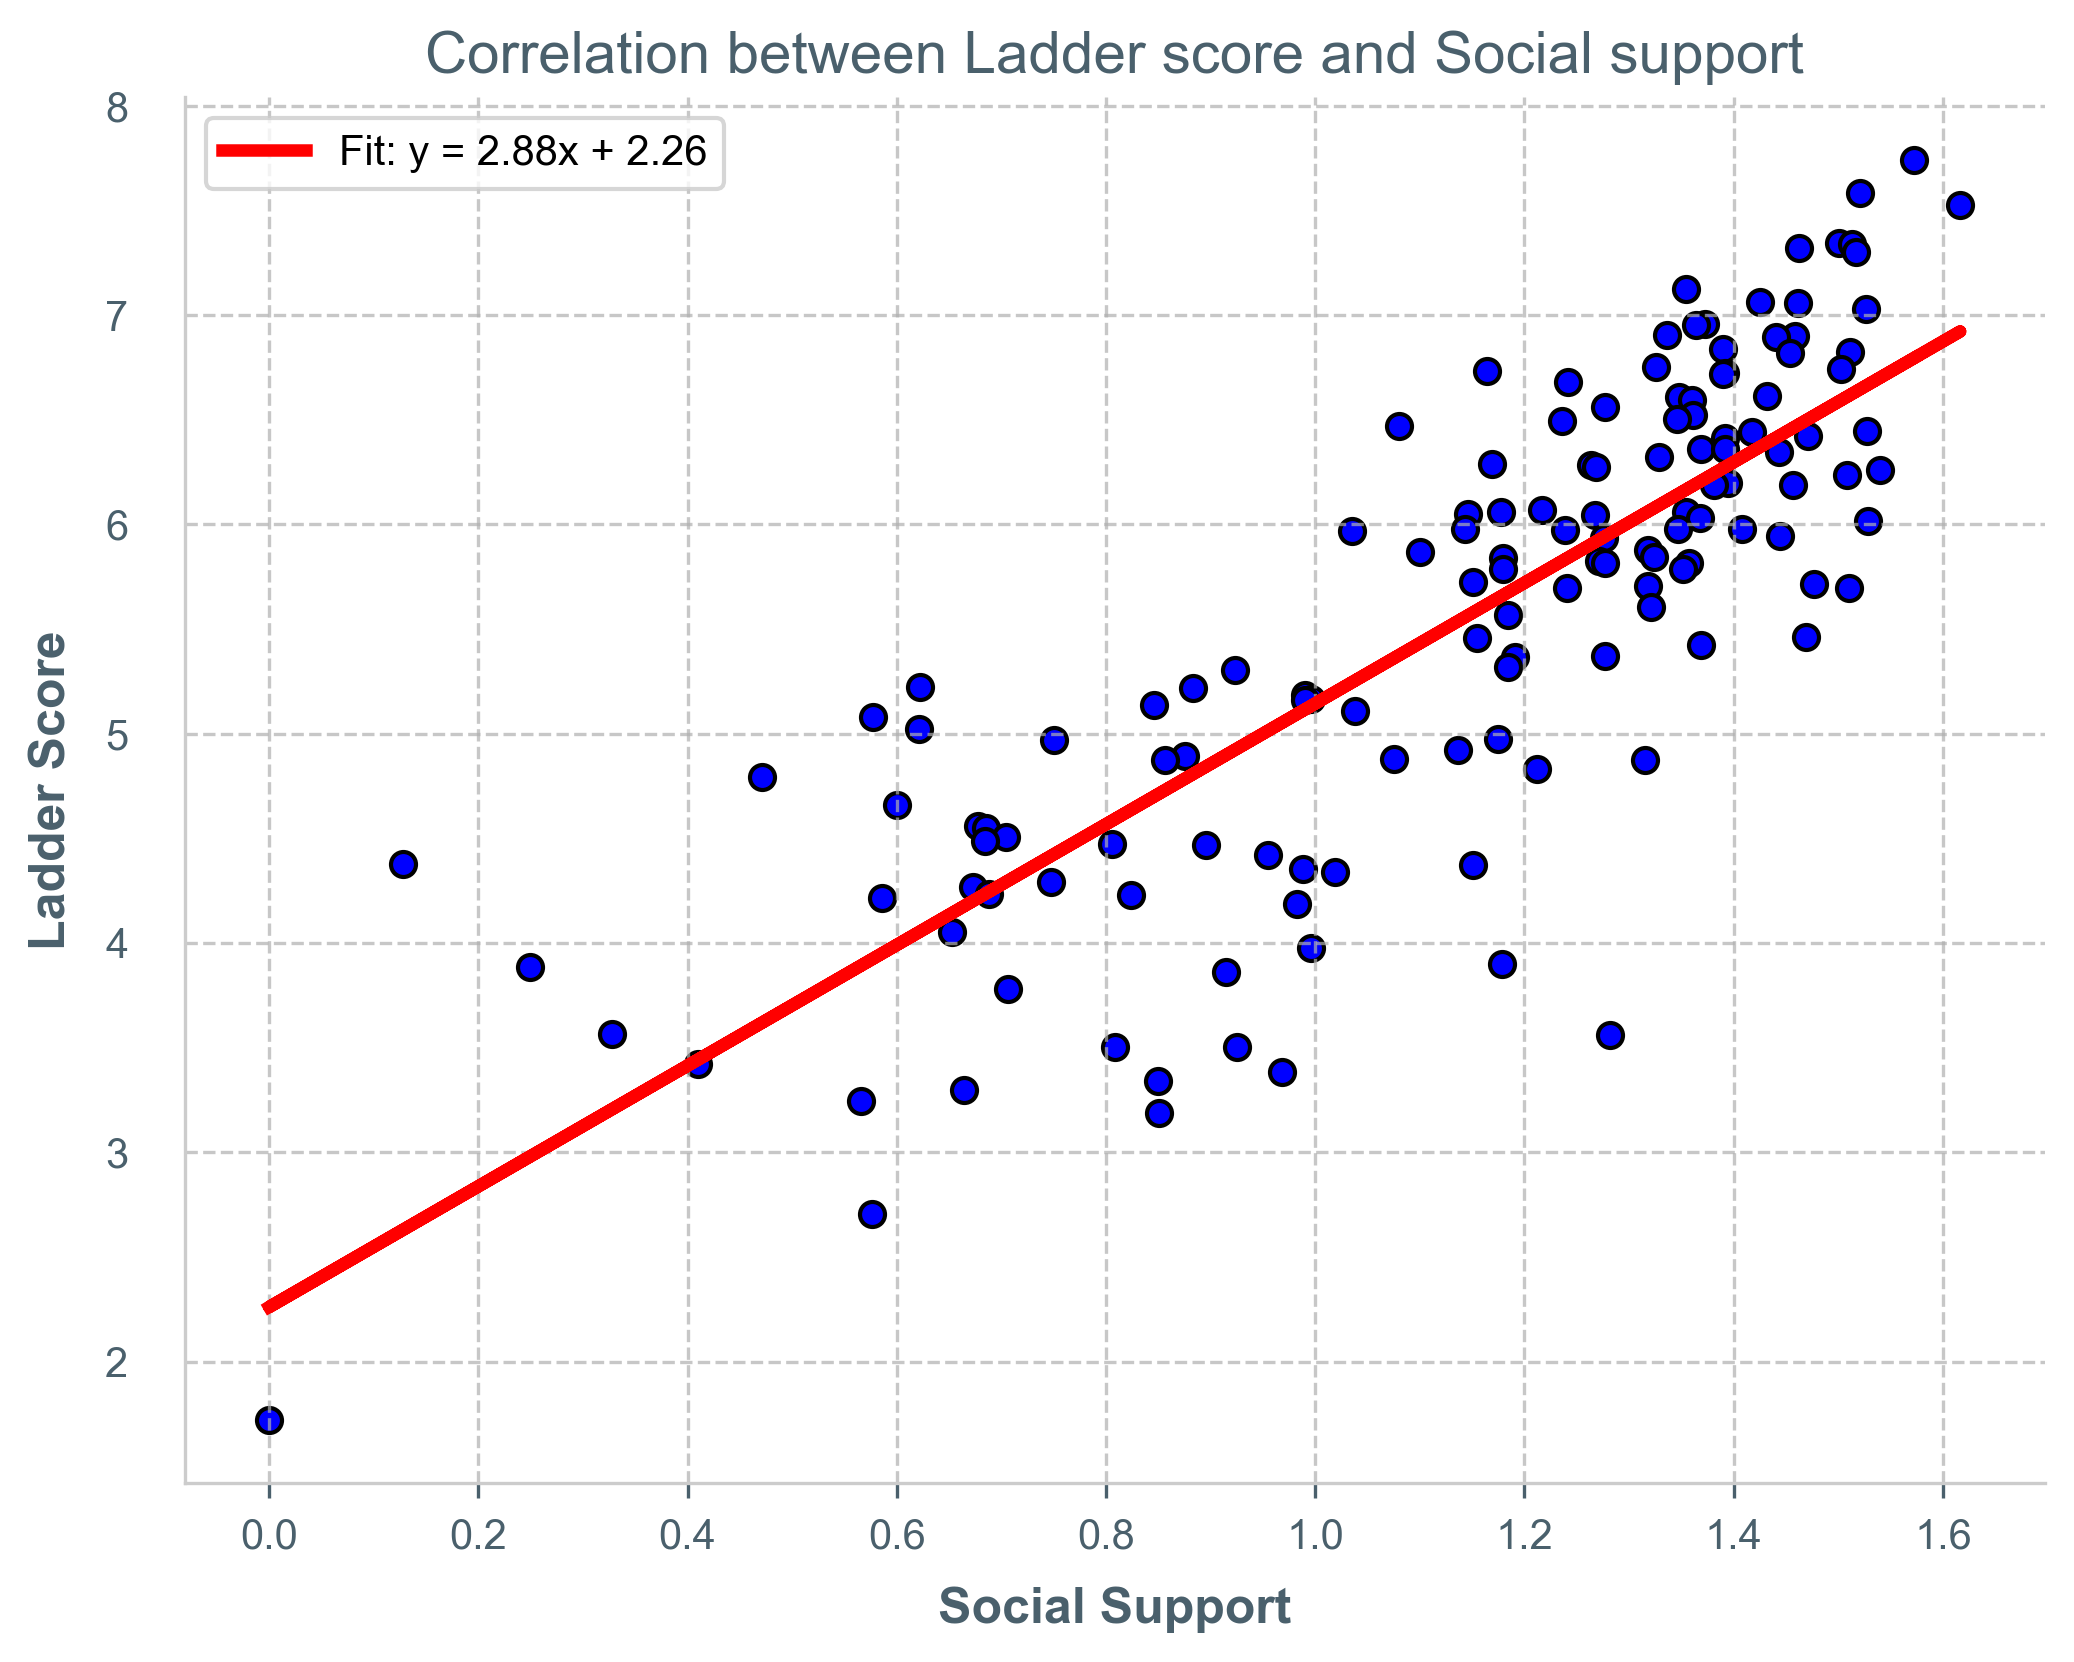

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select only the needed columns and drop any rows with missing data
x = df['Explained by: Social support']
y = df['Ladder score']

# Drop NaNs
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Now plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', edgecolors='black')

# Add trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Fit: y = {m:.2f}x + {b:.2f}')

# Labels and title
plt.title('Correlation between Ladder score and Social support', fontsize=14)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

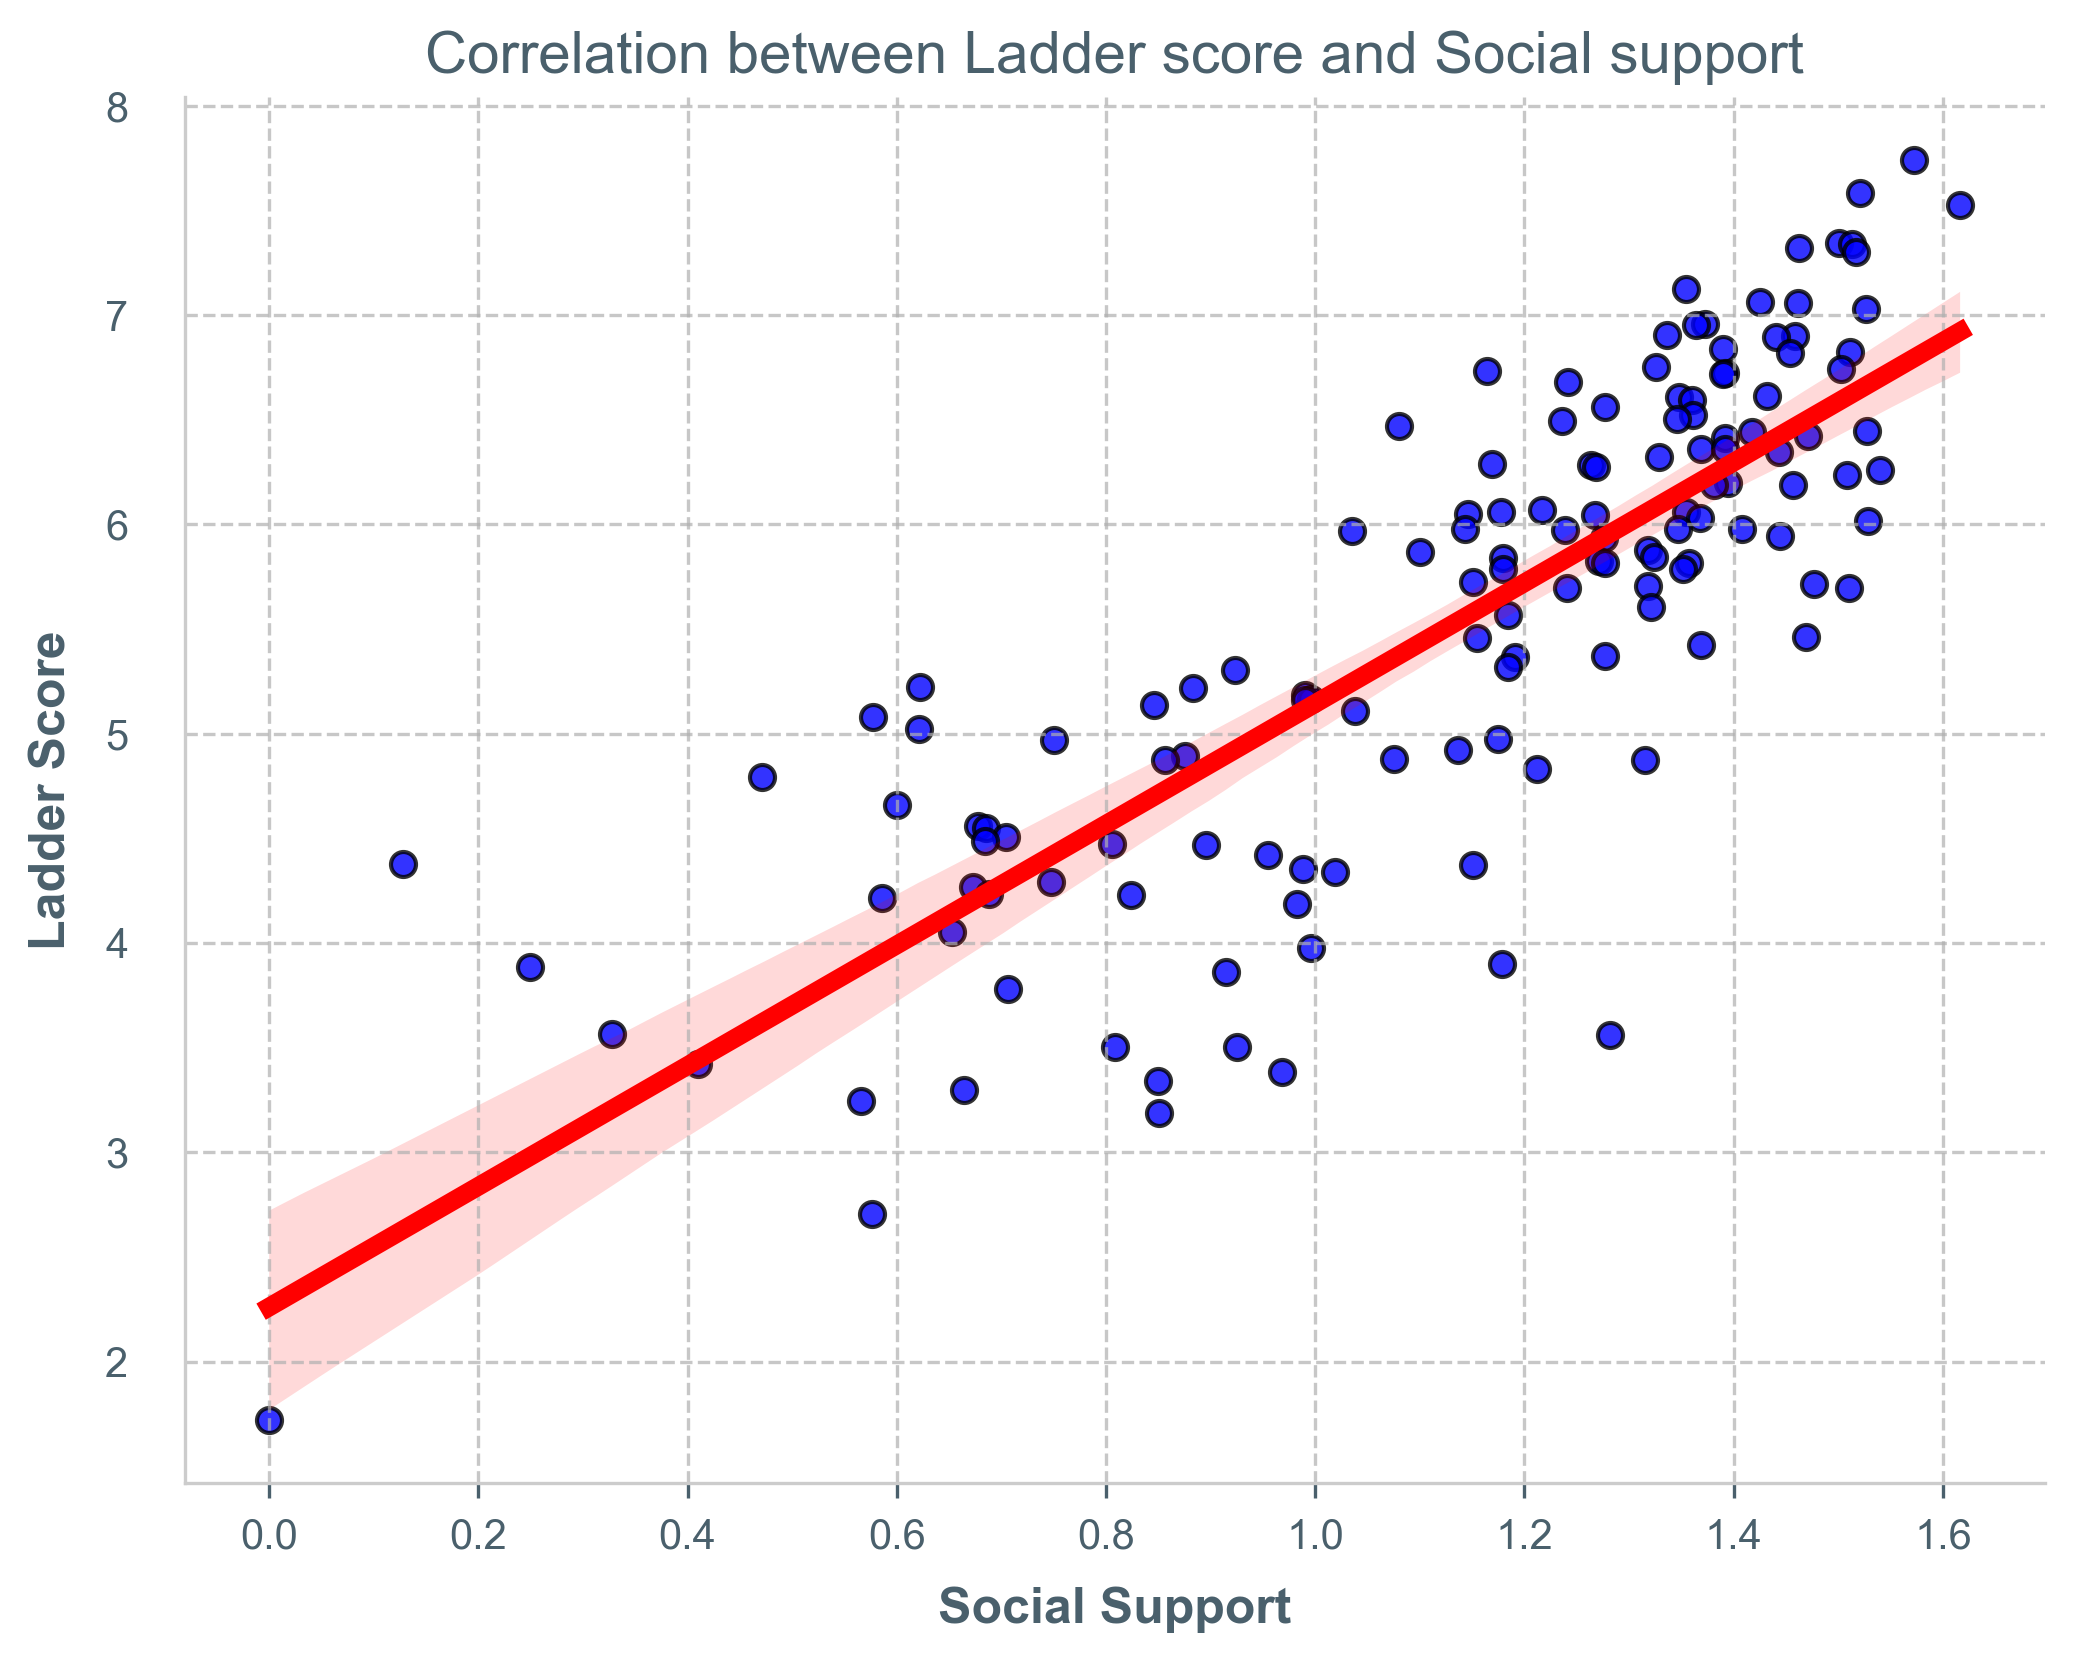

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple scatter + regression line using seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x='Explained by: Social support',
    y='Ladder score',
    scatter_kws={'color': 'blue', 'edgecolor': 'black'},
    line_kws={'color': 'red'}
)

# Titles and labels
plt.title('Correlation between Ladder score and Social support', fontsize=14)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
from scipy.stats import pearsonr

x = df['Explained by: Social support']
y = df['Ladder score']

# Drop NaNs
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Calculate Pearson correlation
r_value, p_value = pearsonr(x, y)

print(f"Correlation coefficient (r): {r_value:.3f}")
print(f"P-value: {p_value:.3f}")

Correlation coefficient (r): 0.814
P-value: 0.000


In [48]:
# Step 1: Rename DataFrame's columns 
# Create a mapping: old name -> new name
rename_mapping = {
    'Explained by: Log GDP per capita': 'Log GDP per capita',
    'Explained by: Social support': 'Social support',
    'Explained by: Healthy life expectancy': 'Healthy life expectancy',
    'Explained by: Freedom to make life choices': 'Freedom to make life choices',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Perceptions of corruption'
}

# Apply the renaming
df_renamed = df.rename(columns=rename_mapping)

# Step 2: Use the clean columns to plot

# Select the relevant columns (with new names)
columns_of_interest = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Calculate correlation matrix
corr_matrix = df_renamed[columns_of_interest].corr()

# Only keep correlations with 'Ladder score'
ladder_corr = corr_matrix[['Ladder score']].drop('Ladder score')


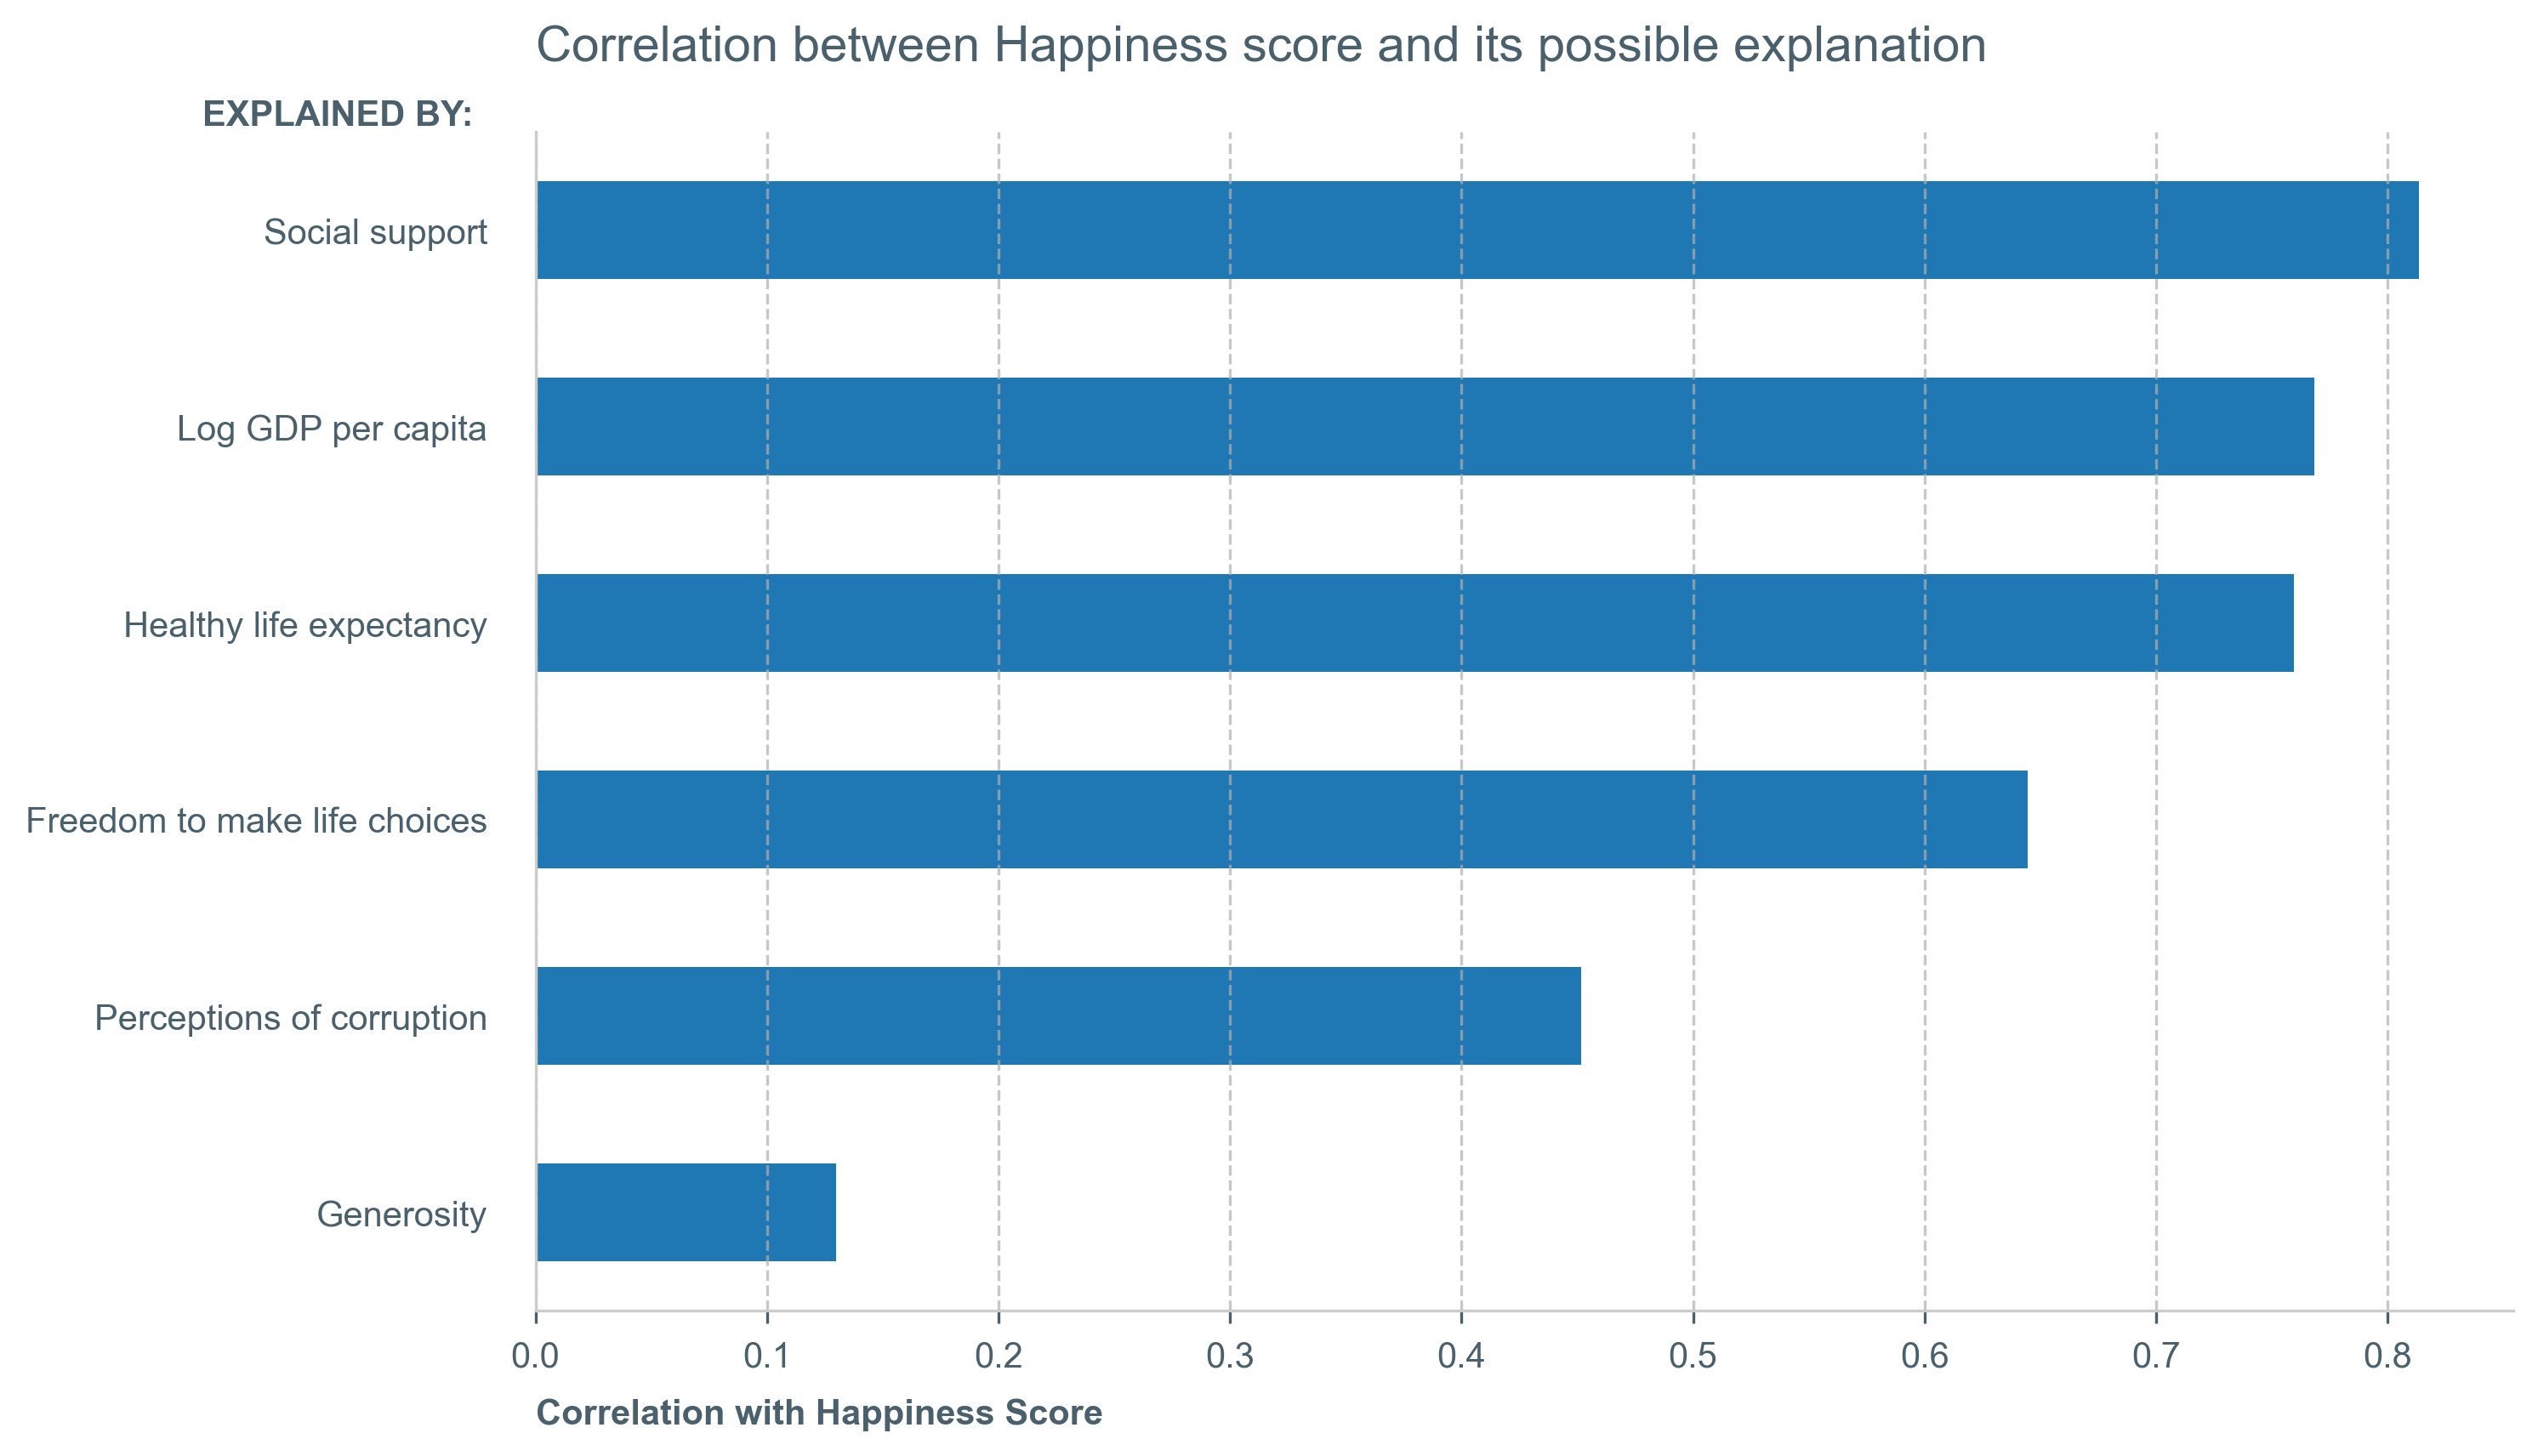

In [49]:
import matplotlib.pyplot as plt
from charts_utils import label_options
plt.style.use("styles/base.mplstyle")

# Sort the correlations
ladder_corr_sorted = ladder_corr.sort_values(by='Ladder score', ascending=True)  # Ascending for horizontal bar plot

# Plot horizontal bar chart
ax = ladder_corr_sorted.plot(kind = "barh")

ax = label_options(
    ax, 
    title= 'Correlation between Happiness score and its possible explanation',
    xlabel= 'Correlation with Happiness Score',
    ylabel= 'EXPLAINED BY:',
    ylabel_rotation = 0
    )


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
